In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ! pip install spectrum
import spectrum

## Exercise 8.1: FMCW: Single Chirp with ULA

In [2]:
fs=1e6; B=250e6; fc=24.125e9; T=1e-3; F_dB=12; T0=270; R=50
NA=8          # number of channels

A0_arr=np.array([20, 18, 0.1, 2, 2, 0.1])*1e-6  # magnitude
r0_arr=np.array([0.001, 0.1, 15, 15, 40, 80])   # ranges
theta0_arr=np.array([-3, 5, -35, -31, 0, 10])   # angles (degree)

In [3]:
wave_speed = 299792458 # is the speed of light; 299,792,458 metres per second 
my_lambda = wave_speed/fc

Ts = 1/fs

N = int(fs*T)
n = np.arange(N)
#n = np.linspace(0, T, N, endpoint=False)
#n = np.append(-np.flip(n/2),n/2)
sampling_interval = 1/fs 
k = B/T

# to get noise std:
F = 10**(F_dB/10)
Te = F*T0-T0
kB = 1.38e-23 # Boltzmann constant
PN = kB*Te/T
noise_std = np.sqrt(PN*R)
noise = noise_std * np.random.randn(N, NA)

In [4]:
sif_nna = np.zeros((len(n),NA))
for n_ in n:
    for na_ in range(NA):
        phi_nna = 2*fc*r0_arr/wave_speed + Ts*2*k*r0_arr*n_/wave_speed + np.sin(theta0_arr)*na_/2
        
        content = A0_arr * np.cos(2*np.pi*phi_nna) 
        sif_nna[n_,na_] = np.sum(content) + noise[n_,na_]


In [5]:
#rect_wind = 1 # doesn't change anything
han_wind = np.hanning(len(n)) # range;  no plot of neg f in other homework
window = han_wind.reshape(1,-1).repeat(NA,axis=0)

fft_combi = np.fft.fft2(sif_nna*window.T, s=(90,NA))
fft_combi = np.fft.fftshift(fft_combi, axes=1)
fft_power = abs(fft_combi/np.sum(window))**2

## Exercise 8.2: FMCW: Single Chirp with ULA - FFT Spectrum

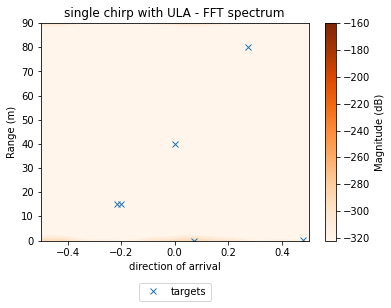

In [6]:
fft_power_log = 20*np.log10(fft_power)
plt.imshow(fft_power_log,
           cmap='Oranges',
           vmax=np.max(fft_power_log),
           vmin=-160,

           origin='lower', aspect='auto',
           extent=(-0.5,0.5,0,90))
plt.xlabel('direction of arrival')
plt.ylabel('Range (m)')
plt.colorbar(label='Magnitude (dB)')
plt.title('single chirp with ULA - FFT spectrum')
plt.plot(-np.sin(theta0_arr)/2, r0_arr, 'x', label='targets') # last value is in velocity out of range, therefore
# we let it out here
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3))

## Homework 8.1: FMCW: Single Chirp with ULA - DBF

/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  


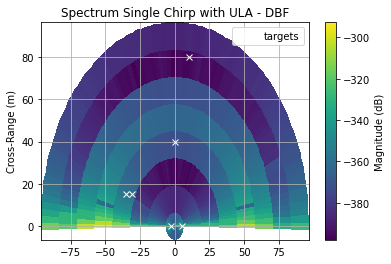

In [7]:
theta=np.linspace(-np.pi/2, np.pi/2, fft_power_log.shape[0])
theta=theta[:,np.newaxis]            # make theta a column vector
r=np.linspace(0, 90, fft_power_log.shape[1])
X=r*np.sin(theta); Y=r*np.cos(theta) # list x colum vector produces a matrix

# plot:
c=plt.pcolormesh(X, Y, fft_power_log)         # plot it
plt.colorbar(label='Magnitude (dB)')          # add colorbar
plt.ylabel('Range (m)')
plt.ylabel('Cross-Range (m)')
plt.title('Spectrum Single Chirp with ULA - DBF')


X_tar = theta0_arr
Y_tar = r0_arr
plt.plot(X_tar, Y_tar, 'wx', label='targets')

plt.legend()
plt.grid()                           # common plot formatting stuff works too

## Homework 8.2: Pseudo Spectrum

In [8]:
TdBV = -140 # formula: volt_dBV = 20*np.log10(voltage*10**-3 V)  (https://www.everythingrf.com/community/what-is-dbv)
# Other formula however: volt_dBV = 20*np.log10(voltage_V) (https://www.onesdr.com/volt-v-to-dbv-calculator/)
ZA_fine = 256
P = [2,3]

In [9]:
threshold_fulfilling_range_ind = np.array(set(np.where(fft_power_log >= TdBV)[0]))

if (threshold_fulfilling_range_ind) != []:
    pass

else:
    # my problem: the list is empty for this threshold, take them from exercise slides:
    threshold_fulfilling_ranges = np.array([0,0.599585,1.199170,1.798755,2.39834,2.997952,3.597509,14.390038,14.989623,15.589208,38.373435,38.973020,39.572604,40.172189,40.771774,41.371359,79.744794,80.344379])
    
    distances = np.linspace(0,90,fft_power_log.shape[0])
    threshold_fulfilling_range_ind = []
    
    for i in range(len(threshold_fulfilling_ranges)):
        
        threshold_fulfilling_range_ind_part = np.where((distances.round(6) <= threshold_fulfilling_ranges[i]+0.8) & (distances.round(6) >= threshold_fulfilling_ranges[i]-0.8))[0]
        
        if threshold_fulfilling_range_ind_part == []:
            pass
        
        elif len(threshold_fulfilling_range_ind_part)>1:
            
            closest_ind = np.argmin(abs(distances[threshold_fulfilling_range_ind_part]-threshold_fulfilling_ranges[i]))
            threshold_fulfilling_range_ind_part = threshold_fulfilling_range_ind_part[closest_ind]
         
            threshold_fulfilling_range_ind.append(threshold_fulfilling_range_ind_part)
        
        else:
            threshold_fulfilling_range_ind.append(threshold_fulfilling_range_ind_part[0])

        
    threshold_fulfilling_range_ind = np.array(list(set(threshold_fulfilling_range_ind)))
    # with set() filter out distances which appear twice due to indexing thorugh 'distances'

/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


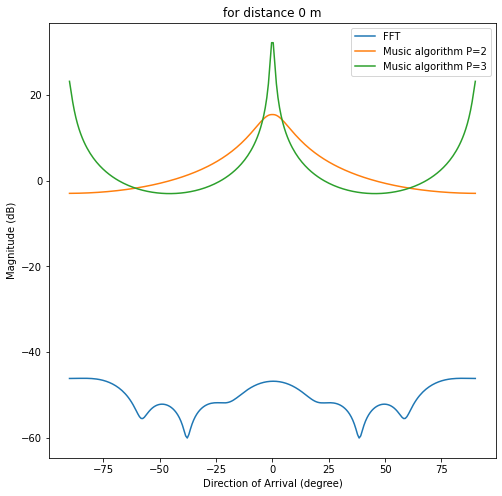

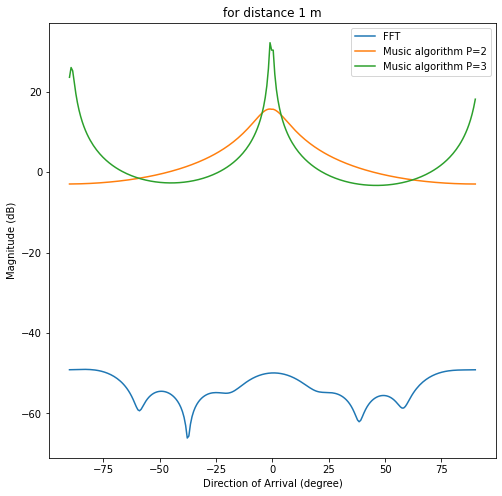

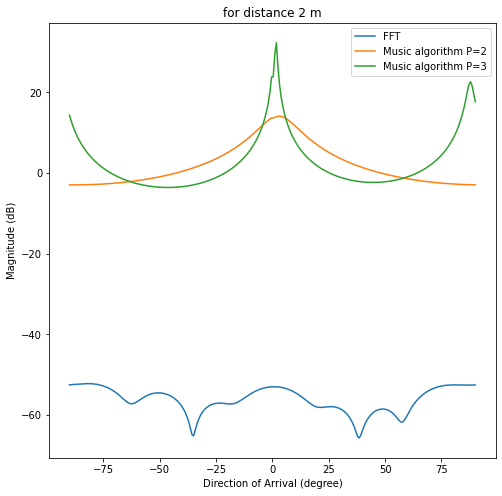

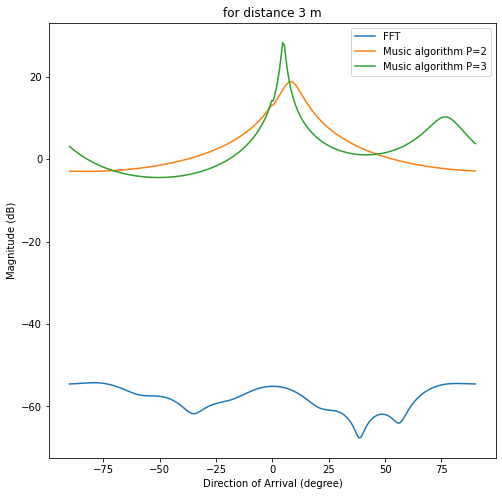

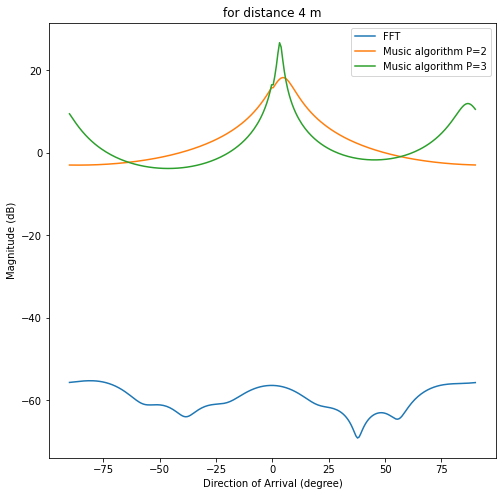

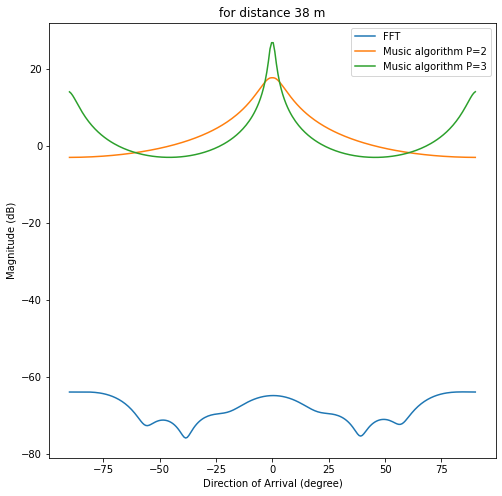

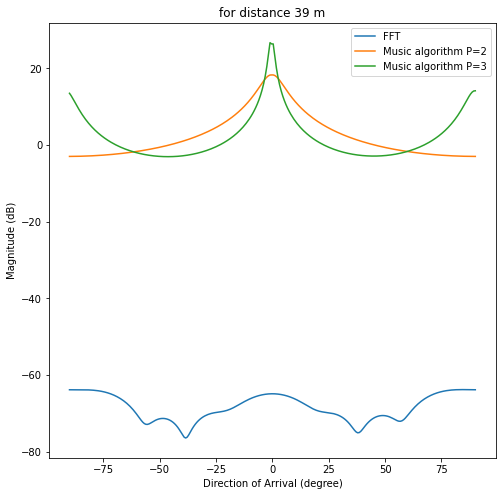

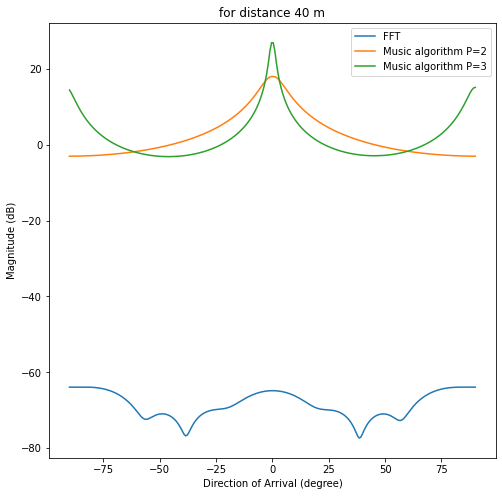

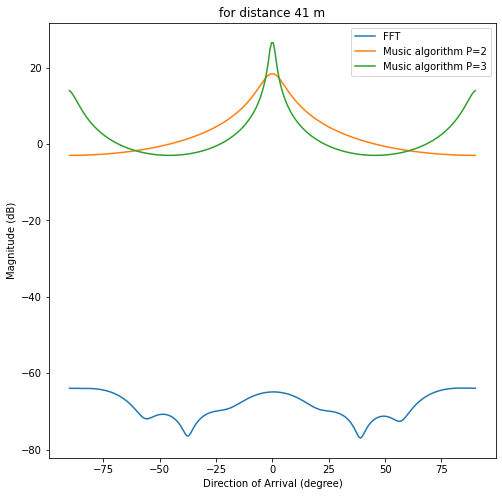

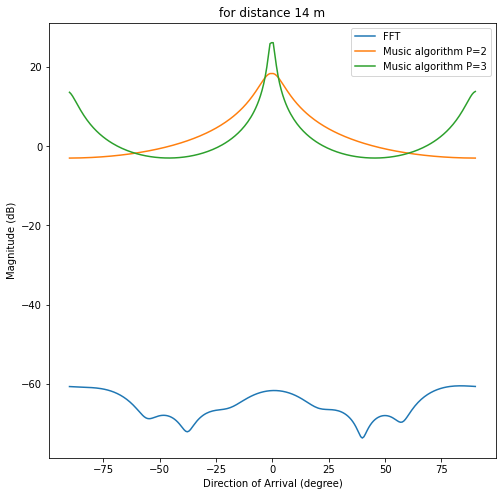

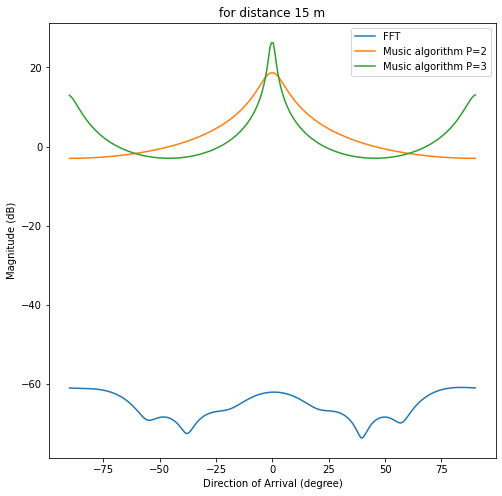

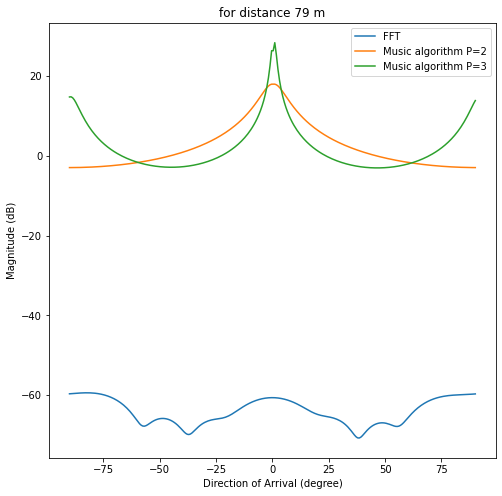

In [11]:
for single_distance in threshold_fulfilling_range_ind:
    
    focus_on = fft_combi[single_distance,:]
    ifft = np.fft.ifft(focus_on)/len(focus_on) # transfer back the signal into time domain
    
    fft_ = np.fft.fft(ifft,ZA_fine)
    fft_spec = 10*np.log10(fft_)#np.abs(fft_/N)**2)
    #fft_spec = np.angle(fft_)
    fft_spec = np.fft.fftshift(fft_spec)


    music_alg1 = spectrum.music(ifft, P[0], NFFT=ZA_fine) 
    music_spec1 = 10*np.log10(music_alg1[0])
    music_spec1 = np.fft.fftshift(music_spec1)

     
    music_alg2 = spectrum.music(ifft, P[1], NFFT=ZA_fine)     
    music_spec2 = 10*np.log10(music_alg2[0])
    music_spec2 = np.fft.fftshift(music_spec2)

    
    # plotting:
    plt.figure(figsize=(8,8))
    angle = np.linspace(-90, 90, len(music_spec2))  # direction of arrival (degree)

    plt.plot(angle,fft_spec, label='FFT')
    plt.plot(angle,music_spec1, label=f'Music algorithm P={P[0]}')
    plt.plot(angle,music_spec2, label=f'Music algorithm P={P[1]}')
    plt.title(f'for distance {single_distance} m')
    plt.xlabel('Direction of Arrival (degree)')
    plt.ylabel('Magnitude (dB)')
    plt.legend()
    plt.show()
    